In [4]:
# %load_ext google.cloud.bigquery
# from google.cloud import bigquery

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [6]:
from datetime import datetime 
from datetime import timedelta
import datetime

In [7]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geopy.geocoders.options.default_user_agent = "my-application"

geolocator = Nominatim(user_agent="myGeocoder")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return (np.nan, np.nan)

In [8]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [9]:
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
#client = bigquery.Client()

In [12]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/jf_data.csv',low_memory=False)

In [13]:
df = data.copy()

In [14]:
df.dropna(axis=1,how='all', inplace=True)

In [15]:
df.columns

Index(['geo__country', 'geo__city', 'event_params__video_title', 'event_name',
       'event_params__language', 'event_params__languageid'],
      dtype='object')

In [16]:
len(df.geo__country.unique())

87

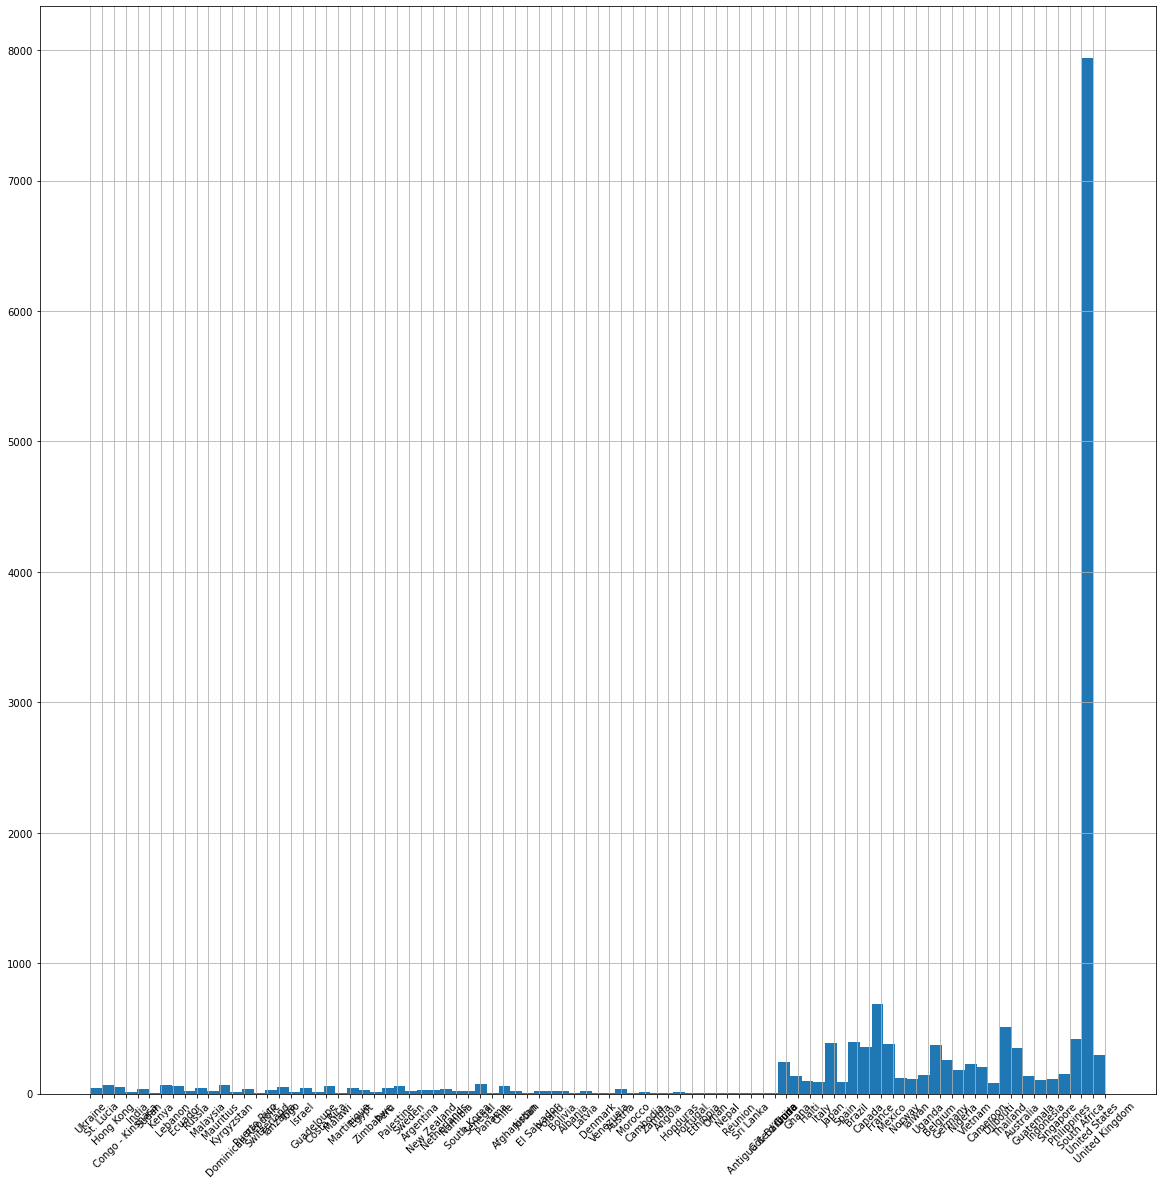

In [17]:
df.geo__country.hist(xrot=45, figsize=(20,20), bins=len(df.geo__country.unique()));

In [18]:
df.event_name.value_counts()

videoplay             4004
videostarts           3419
a_media_progress10    2081
a_media_progress25    1911
a_media_progress50    1660
a_media_progress75    1533
a_media_progress90    1392
Name: event_name, dtype: int64

In [19]:
guat_city_df = df[df['geo__city'] == 'Guatemala City']

In [20]:
guat_city_df.event_name.value_counts()

videoplay             33
videostarts           26
a_media_progress10    17
a_media_progress25    14
a_media_progress90    13
a_media_progress50     9
a_media_progress75     6
Name: event_name, dtype: int64

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 31925 missing from current font.

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 35486 missing from current font.

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 55180 missing from current font.

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 46356 missing from current font.

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 50612 missing from current font.

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 33521 missing from current font.

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends

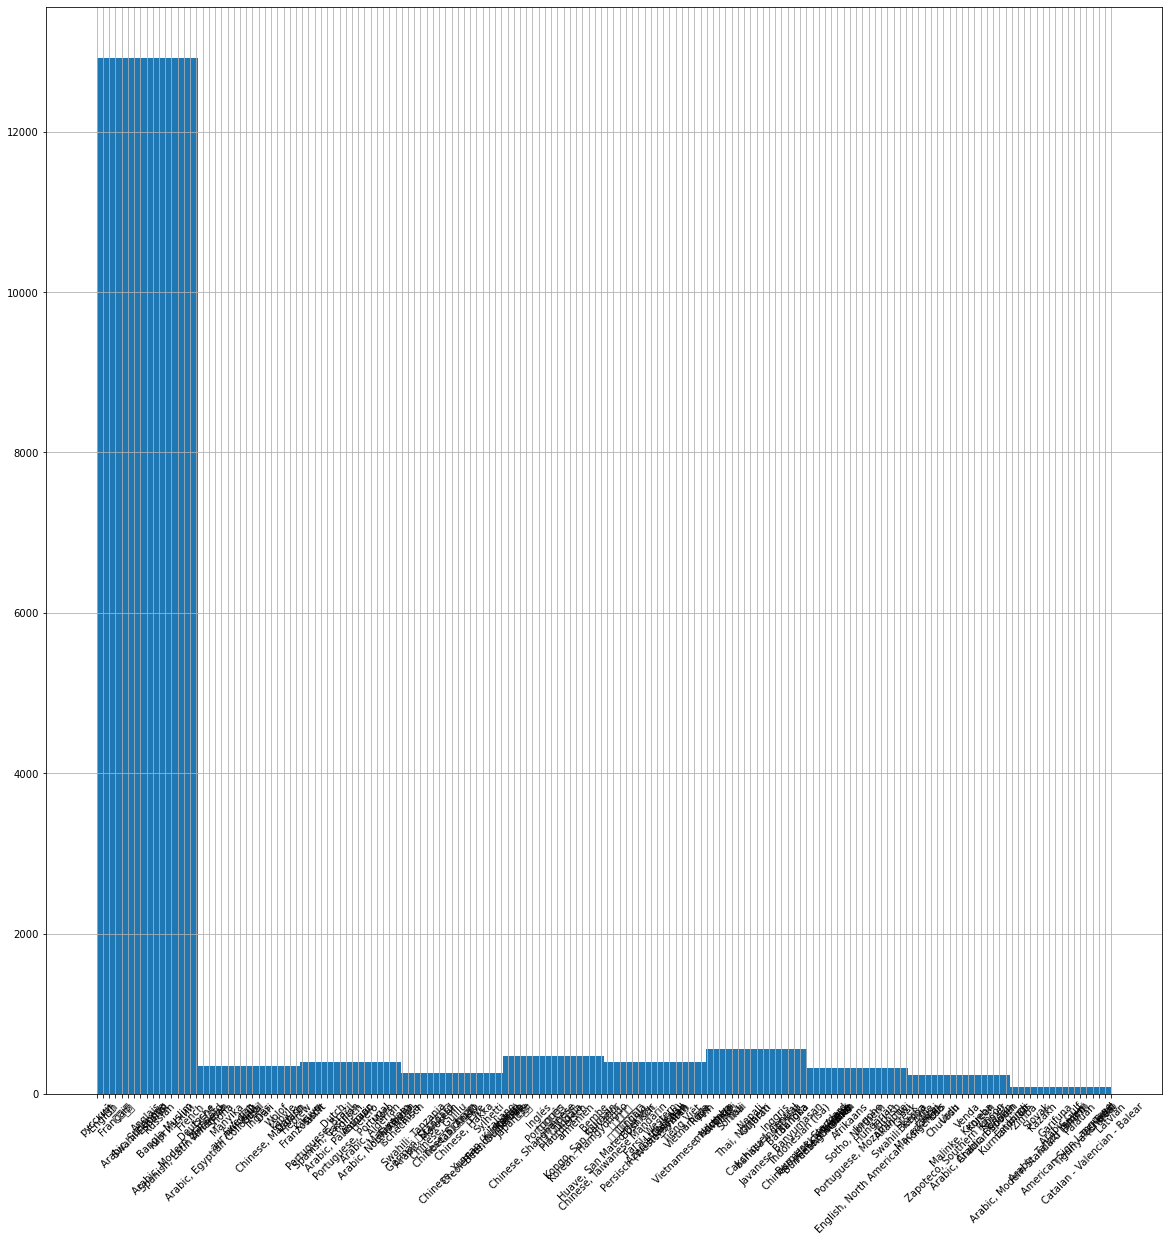

In [21]:
df.event_params__language.hist(figsize=(20,20), xrot=45);

In [22]:
df.head()

,geo__country,geo__city,event_params__video_title,event_name,event_params__language,event_params__languageid
0,Ukraine,NaN,История Иисуса для детей,videoplay,русский,3934
1,St. Lucia,NaN,JESUS,videoplay,English,529
2,Hong Kong,NaN,抹大拉,videoplay,粵語,20601
3,Congo - Kinshasa,Kinshasa,L'histoire de Jésus pour les enfants,videoplay,Français,496
4,Congo - Kinshasa,Kinshasa,L'histoire de Jésus pour les enfants,videoplay,Français,496


In [23]:
#df.user_pseudo_id.value_counts()

In [24]:
#top user AA38C84A3E1442048F72096A4621C17A. Mr. Guatamala City

In [25]:
# dropany_df = drop_df.dropna(axis='columns', how='all')
# #how='any': 1000X24. how='all': 1000x49

In [26]:
df.event_name.value_counts()
#what is the def of these categories?

videoplay             4004
videostarts           3419
a_media_progress10    2081
a_media_progress25    1911
a_media_progress50    1660
a_media_progress75    1533
a_media_progress90    1392
Name: event_name, dtype: int64

In [27]:
#df.user_pseudo_id.value_counts()

# user analysis

In [28]:
#user1 = df[df['user_pseudo_id'] == '1AE4EF46D71643F386340D1630CC6082']

In [29]:
#user2 = df[df['user_pseudo_id'] == 'AA38C84A3E1442048F72096A4621C17A']

In [30]:
#user2.geo__city

In [31]:
#user2.columns

In [32]:
#user3 = df[df['user_pseudo_id'] == '408BAF780ACD4F53B3F245E87ABF44A8']

In [33]:
#user3.iloc[0]

In [34]:
#user4 = df[df['user_pseudo_id'] == 'FD7E053248C94B5BB31CC094C1AE0B18']

In [35]:
#user4.iloc[0]

In [36]:
#df.event_date_partition.value_counts()

In [37]:
#drop_list = ['event_params__firebase_error', 
             'event_params__firebase_event_origin', 
             'event_params__activity_id',
             'event_params__page_location',
             'event_params__session_engaged',
             'event_params__firebase_screen',
             'event_params__session_engaged',
             'event_params__activity_type',
             'event_params__activity_type',
             'event_params__playlist_name',
             'event_params__debug_mode',
             'event_params__event_timestamp',
             'event_params__loggedinstatus',
             'event_params__logged_in_status',
             'event_params__firebase_error',
             'event_params__sideloaded',
             'event_params__firebase_screen_class',
             'event_params__firebase_screen_id',
             'event_params__source',
             'event_params__mediacomponentid',
             'event_params__ssoguid',
             'event_params__medialanguageid',
             'event_params__app_name',
             'event_params__ga_session_number',
             'event_params__ga_session_id',
             'event_params__medialength',
             'event_params__app_store_package_name',
             'event_params__grmasterpersonid',
             'event_params__medium',
             'event_params__campaign',
             'event_params__term',
             'event_params__client_id_ua',
             'event_params__medium',
             'event_params__api_session_id',
             'event_params__isstreaming',
             'event_params__cookieDomain',
             'event_params__video_title',
             'event_params__keyguid',
             'event_params__keyrelayguid',
             'event_params__videotitle',
             'event_params__lang_app_using_default_sys_lang',
             'event_params__language',
             'event_params__page_referrer',
             'event_params__language_app',
             'event_params__page_title',
             'event_params__engaged_session_event',
             'event_params__jfid',
             'event_params__ecid',
             'event_params__language_system',
             'event_params__engagement_time_msec',
             'event_params__languageid',
             'event_params__marketingcloudid',
             'event_params__screen',
             'event_params__playlistid',
             'event_params__error_value']

IndentationError: unexpected indent (<ipython-input-37-9abe07b00725>, line 2)

In [ ]:

#df.info()

In [ ]:
# SELECT 
# geo__country, 
# geo__city,
# event_params__video_title,
# event_params__videotitle,
# event_name,
# event_params__language,
# event_params__medialanguageid
# FROM `jfp-data-warehouse.production_firebase.firebase_event`  
# WHERE event_params__video_title IS NOT NULL AND
# event_params__language IS NOT NULL AND
# #event_name IN ('videostarts',  'videoplay',  'a_media_progress10',  'a_media_progress25',  'a_media_progress50',  'a_media_progress75',  'a_media_progress90') AND 
# DATE(event_date_partition) 
# BETWEEN  "2021-01-01" AND "2021-04-26" 
# LIMIT 16000

In [49]:
import src.ItemItemRecommender as helper

In [50]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/jf_data.csv',low_memory=False)

In [51]:
df = data.copy()

In [52]:
df.head()

,geo__country,geo__city,event_params__video_title,event_params__videotitle,event_name,event_params__language,event_params__languageid
0,Ukraine,NaN,История Иисуса для детей,NaN,videoplay,русский,3934
1,St. Lucia,NaN,JESUS,NaN,videoplay,English,529
2,Hong Kong,NaN,抹大拉,NaN,videoplay,粵語,20601
3,Congo - Kinshasa,Kinshasa,L'histoire de Jésus pour les enfants,NaN,videoplay,Français,496
4,Congo - Kinshasa,Kinshasa,L'histoire de Jésus pour les enfants,NaN,videoplay,Français,496


In [ ]:
#df = helper.preprocess_df(df)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   geo__country               16000 non-null  object 
 1   geo__city                  15097 non-null  object 
 2   event_params__video_title  16000 non-null  object 
 3   event_params__videotitle   0 non-null      float64
 4   event_name                 16000 non-null  object 
 5   event_params__language     16000 non-null  object 
 6   event_params__languageid   16000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 875.1+ KB


In [ ]:
df.geo__country.hist(figsize=(20,10), xrot=45, bins=len(df.geo__country.unique()))
#plt.yscale('log');

In [ ]:
df.geo__city.value_counts()[:15]

<AxesSubplot:>

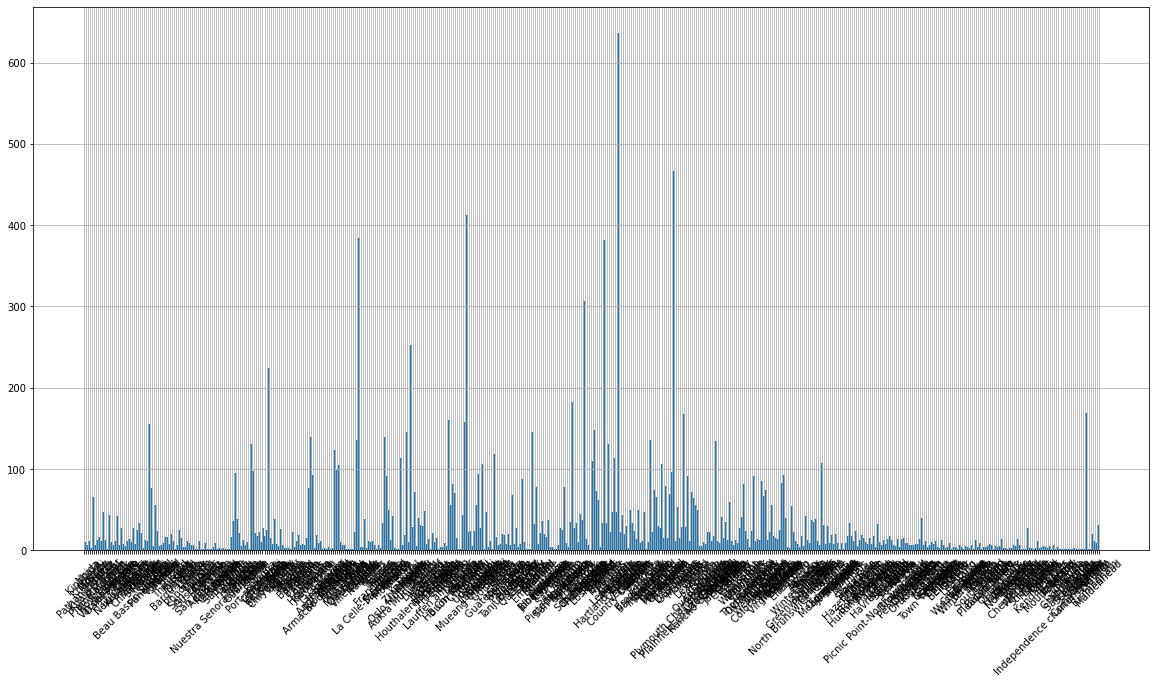

In [38]:
df.geo__city.hist(figsize=(20,10), xrot=45, bins=len(df.geo__city.unique()))
#plt.yscale('log');

In [39]:
english_df = df[df.event_params__language == 'English']

<AxesSubplot:>

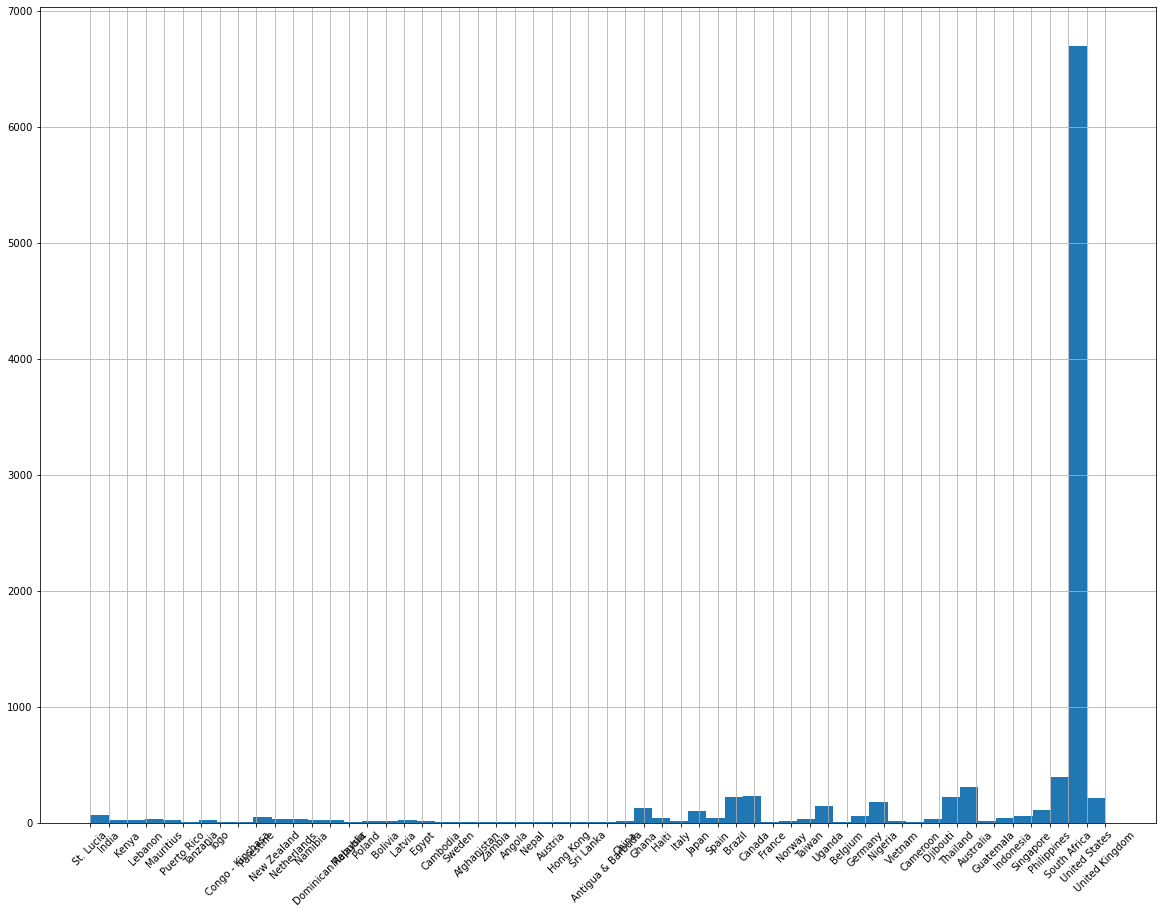

In [40]:
english_df.geo__country.hist(figsize=(20,15), 
                             xrot=45, 
                             bins=len(english_df.geo__country.unique()))
#plt.yscale('log')

In [42]:
#english_df.score.hist()

# EVENT NAME EDA

In [43]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/event_name_eda.csv')

In [44]:
df = data.copy()

In [45]:
df.columns

Index(['event_name', 'f0_'], dtype='object')

In [46]:
df.sort_values(by='f0_', ascending=False, inplace=True)

In [47]:
labels = df.event_name
values= df.f0_
x = np.arange(len(labels))

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



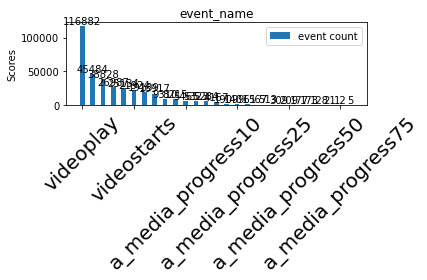

<Figure size 1440x1440 with 0 Axes>

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df.event_name
values= df.f0_

x = np.arange(len(labels))
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x=x, height=values, width=width, label='event count')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('event_name')
ax
ax.set_xticklabels(labels=labels, fontsize=20,rotation=45)

ax.legend()
ax.bar_label(rects1, padding=0)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.figure(figsize=(20,20))
plt.show();

In [ ]:
# SELECT 
# device__category,
# geo__city,
# geo__metro,
# geo__country, 
# geo__region,
# geo__sub_continent,
# geo__continent,
# event_params__video_title,
# event_params__videotitle,
# event_params__activity_total_time,
# event_params__language,
# device__language,
# event_params__languageid,
# event_params__mediacomponentid,
# event_name
# FROM `jfp-data-warehouse.production_firebase.firebase_event` 
# WHERE 
# event_params__language IS NOT NULL AND
# geo__country in ('Afghanistan',
#  'Algeria',
#  'Azerbaijan',
#  'Bahrain',
#  'Bangladesh',
#  'Bhutan',
#  'Brunei',
#  'China',
#  'Egypt',
#  'India',
#  'Indonesia',
#  'Iran',
#  'Iraq',
#  'Japan',
#  'Jordan',
#  'Kazakstan',
#  'Kuwait',
#  'Kyrgyzstan',
#  'Laos',
#  'Libya',
#  'Malaysia',
#  'Maldives',
#  'Mali',
#  'Mauritania',
#  'Mongolia',
#  'Morocco',
#  'Myanmar',
#  'Nepal',
#  'Niger',
#  'North Korea',
#  'Oman',
#  'Pakistan',
#  'Palestine',
#  'Qatar',
#  'Russia',
#  'Saudia Arabia',
#  'Somalia',
#  'Sri Lanka',
#  'Sudan',
#  'Syria',
#  'Tajikistan',
#  'Thailand',
#  'Timor Leste',
#  'Tunisia',
#  'Turkey',
#  'Turkmenistan',
#  'UAE',
#  'Uzbekistan',
#  'Vietnam',
#  'Yemen') AND 
# event_params__video_title IS NOT NULL AND
# DATE(event_date_partition) 
# BETWEEN  "2021-01-01" AND "2021-05-01" 
# #times_completed DESC 
# LIMIT 16000

In [55]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/top50_04:04.csv')

In [56]:
df = data.copy()

<AxesSubplot:>

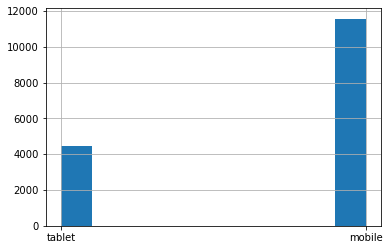

In [59]:
df.device__category.hist()